# Tomato Leaf Detection using VGG19 model
## Very Deep Convolutional Networks for Large-Scale Image Recognition

# Importing all the requirements

In [1]:
import numpy as np
import pandas as pd
import os

# Creating the path

In [2]:
# Importing the images 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/BTP/Dataset/tomato.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/BTP/Dataset/dataset')

In [10]:
train_path='/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/train/'
valid_path='/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/valid/'

In [11]:
# train_path='./train/'
print(os.listdir(train_path))
print("*"*100)
# valid_path='./valid/'
print(os.listdir(valid_path))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
****************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [12]:
folder=(os.listdir(train_path))
folder

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

# Represting the Tomatos

<ul>
    <li><h3>ty : being the type of disease</h3></li>
    <li><h3>index : being the image in the data sets.</h3></li>
</ul>

Text(0.5, 1.0, 'Tomato___Late_blight')

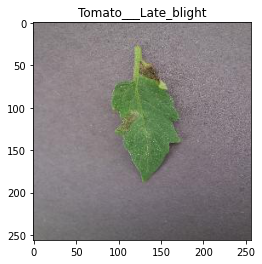

In [13]:
ty=2
index=25
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_path+folder[ty]+"/"+(os.listdir(train_path+folder[ty])[index])))
plt.title(folder[ty])

# Importing packages

In [14]:
from tensorflow.keras.layers import Lambda, Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [15]:
size=[128,128]
vgg19=VGG19(input_shape=size+[3],weights='imagenet',include_top=False)

80134624/80134624 [==============================] - 4s 0us/step


# Freezing the rest of the layers

In [16]:
for layer in vgg19.layers:
    layer.trainable=False

## Creating the top layer for my desired prediction

In [17]:
x=Flatten()(vgg19.output)
prediction=Dense(len(folder),activation='softmax')(x)

model_vgg=Model(inputs=vgg19.input,outputs=prediction)

# Model Summary

In [18]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

# Compiling the model

In [19]:
plateau = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=7, 
            verbose=0,
            mode='min')

In [20]:
# model_vgg.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'],callbacks=[plateau])
model_vgg.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Data Augmentation

In [21]:
train_datagen=ImageDataGenerator(validation_split=0.2,rescale=1./255,horizontal_flip=True,rotation_range=.2,shear_range=.2)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [22]:
TRAINING_DIR = '/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/train/' 
TESTING_DIR = '/content/drive/MyDrive/BTP/Dataset/dataset/New Plant Diseases Dataset(Augmented)/valid/'

In [23]:
train_set=train_datagen.flow_from_directory(TRAINING_DIR,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=True, 
                                            subset="training")

validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(128, 128),
        batch_size=16,
        class_mode='categorical',
        shuffle=True,
        subset="validation")


valid_set=valid_datagen.flow_from_directory(TESTING_DIR,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=False)

Found 14678 images belonging to 10 classes.
Found 3667 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [24]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

# history=model_vgg.fit(train_set,
#                 validation_data=validation_generator,
#                 epochs=9,
#                 callbacks=[tb_callback]
#                 )

history=model_vgg.fit(train_set,
                validation_data=validation_generator,
                epochs=50)


Epoch 1/50
918/918 [==============================] - 144s 147ms/step - loss: 0.8155 - accuracy: 0.7280 - val_loss: 0.8132 - val_accuracy: 0.7295
Epoch 2/50
918/918 [==============================] - 126s 138ms/step - loss: 0.5011 - accuracy: 0.8294 - val_loss: 0.5792 - val_accuracy: 0.7998
Epoch 3/50
918/918 [==============================] - 127s 138ms/step - loss: 0.4012 - accuracy: 0.8637 - val_loss: 0.5050 - val_accuracy: 0.8238
Epoch 4/50
918/918 [==============================] - 127s 138ms/step - loss: 0.3554 - accuracy: 0.8789 - val_loss: 0.6102 - val_accuracy: 0.7903
Epoch 5/50
918/918 [==============================] - 126s 137ms/step - loss: 0.3138 - accuracy: 0.8935 - val_loss: 0.5743 - val_accuracy: 0.8072
Epoch 6/50
918/918 [==============================] - 126s 137ms/step - loss: 0.2944 - accuracy: 0.8969 - val_loss: 0.5001 - val_accuracy: 0.8339
Epoch 7/50
918/918 [==============================] - 126s 137ms/step - loss: 0.2551 - accuracy: 0.9133 - val_loss: 0.5041 -

# Visualizing the Fitting of the model

Text(0.5, 1.0, 'Training and validation loss')

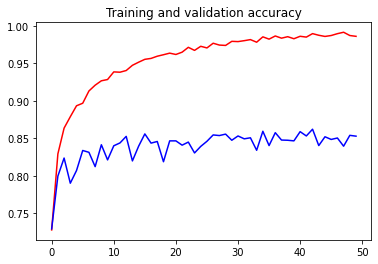

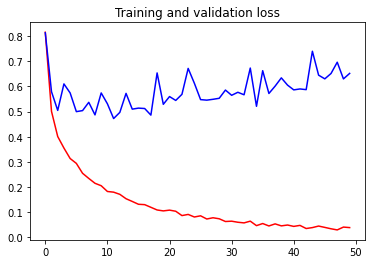

In [25]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', )
plt.plot(epochs, val_acc, 'b', )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', )
plt.plot(epochs, val_loss, 'b', )


plt.title('Training and validation loss')

In [27]:
# Scores is just a list containing loss and accuracy value
scores=model_vgg.evaluate(train_set)
scores2=model_vgg.evaluate(valid_set)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

287/287 [==============================] - 15s 52ms/step - loss: 0.4796 - accuracy: 0.8838
Training Loss is :0.03727676719427109
Training Accuracy is :98.79411458969116 %
Testing Loss is : 0.47957977652549744
Testing Accuracy is : 88.3751392364502 %


# Predicting the model

### %Load_ext tensorboard
### %tensorboard --Logdir Logs/fit

In [26]:
y_pred=model_vgg.predict(valid_set)

287/287 [==============================] - 16s 56ms/step


# saving the model

In [28]:
model_vgg.save('model_vgg19.h5')

# Checking the prediction of the model

In [29]:
import cv2
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
    img_array=img_array/255
    new_array=cv2.resize(img_array,(128,128))
    return new_array.reshape(-1,128,128,3)

In [30]:
class_dict=train_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [31]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction)==clss:
            return key


In [32]:
ty=9
index=6
#import matplotlib.pyplot as plt
print(folder[ty])
pred=model_vgg.predict([prepare(valid_path+folder[ty]+"/"+(os.listdir(valid_path+folder[ty])[index]))])
prediction_cls(pred)
#plt.title(folder[ty])

Tomato___healthy
1/1 [==============================] - 1s 695ms/step


'Tomato___Septoria_leaf_spot'